In [193]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from math import pow
import math
import sys
from scipy import special
from scipy.linalg import eig
from functools import reduce
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from utilspie import iterutils

def xyz_reader(filename):
         file = open(file_name, 'r')
        

         number_of_atoms = 0
         atom_type = []
         atom_coordinates_coulomb = []
         atom_coordinates_repulsion = []
         atom_coordinates_dispersion = []
         atom_coordinates_center_masses = []
         atom_coordinates_Oxygen = []
         

         for idx, line in enumerate(file):
             if idx == 0:
                 try:
                   number_of_atoms = line.split()[0]

                   #print(number_of_atoms)
                 except:
                   print("xyz file is not a correct format")

             if idx == 1:
                 continue

             # Get atom types and positions
             if idx != 0:
                 split = line.split()
                 atom = split[0]
                 #print(atom)
                 coordinates = np.array([float(split[1]), float(split[2]), float(split[3])])
                 #print(coordinates)
                 
                 #Extration of coordinates for coulomb potential
                 coordinates_coulomb = dict(zip(np.array([atom]), np.array([coordinates])))
                 #print(coordinates_coulomb)
                 for i in list(coordinates_coulomb):
                     #print(i)
                     if i == 'G':
                        del coordinates_coulomb[i]

                 for j in list(coordinates_coulomb):
                     if j == 'O':
                        del coordinates_coulomb[j]
                 #print(coordinates_coulomb)

                 #Extration of coordinates for repulsion potential
                 coordinates_repulsion = coordinates
                 #print(coordinates_repulsion)
                 coordinates_repulsion = dict(zip(np.array([atom]), np.array([coordinates_repulsion])))
                 #print(coordinates_repulsion)
                 for k in list(coordinates_repulsion):
                     #print(k)
                     if k == 'G':
                        del coordinates_repulsion[k]

                 for l in list(coordinates_repulsion):
                     if l == 'E':
                        del coordinates_repulsion[l]
                 #print(coordinates_repulsion)

                 #Extration of coordinates for dispersion potential
                 coordinates_dispersion = coordinates
                 #print(coordinates_dispersion)
                 coordinates_dispersion = dict(zip(np.array([atom]), np.array([coordinates_dispersion])))
                 #print(coordinates_dispersion)
                 for k in list(coordinates_dispersion):
                     #print(k)
                     if k == 'O':
                        del coordinates_dispersion[k]

                 for l in list(coordinates_dispersion):
                     if l == 'H':
                        del coordinates_dispersion[l]

                 for m in list(coordinates_dispersion):
                     if m == 'E':
                        del coordinates_dispersion[m]
                 #print(coordinates_dispersion)


                 #Extration of coordinates for G_HCl and G_H2O
                 coordinates_center_masses = coordinates
                 #print(coordinates_center_masses)
                 coordinates_center_masses = dict(zip(np.array([atom]), np.array([coordinates_center_masses])))
                 #print(coordinates_center_masses)
                 for k in list(coordinates_center_masses):
                     #print(k)
                     if k == 'O':
                        del coordinates_center_masses[k]

                 for l in list(coordinates_center_masses):
                     if l == 'H':
                        del coordinates_center_masses[l]

                 for m in list(coordinates_center_masses):
                     if m == 'E':
                        del coordinates_center_masses[m]

                 for n in list(coordinates_center_masses):
                     if n == 'CL':
                        del coordinates_center_masses[n]

                 for o in list(coordinates_center_masses):
                     if o == 'H*':
                        del coordinates_center_masses[o]
                 #print(coordinates_center_masses)


                 #Extration of coordinates for Oxygen
                 coordinates_Oxygen = coordinates
                 #print(coordinates_Oxygen)
                 coordinates_Oxygen = dict(zip(np.array([atom]), np.array([coordinates_Oxygen])))
                 #print(coordinates_Oxygen)
                 for k in list(coordinates_Oxygen):
                     #print(k)
                     if k == 'CL':
                        del coordinates_Oxygen[k]

                 for l in list(coordinates_Oxygen):
                     if l == 'H*':
                        del coordinates_Oxygen[l]

                 for m in list(coordinates_Oxygen):
                     if m == 'E':
                        del coordinates_Oxygen[m]

                 for n in list(coordinates_Oxygen):
                     if n == 'H':
                        del coordinates_Oxygen[n]

                 for o in list(coordinates_Oxygen):
                     if o == 'G':
                        del coordinates_Oxygen[o]
                 #print(coordinates_Oxygen)
  
  

                             

                 atom_type.append(atom)
                 #print(atom_type)

                 atom_coordinates_coulomb.append(coordinates_coulomb)
                 #print(atom_coordinates_coulomb)

                 atom_coordinates_repulsion.append(coordinates_repulsion)
                 #print(atom_coordinates_repulsion)

                 atom_coordinates_dispersion.append(coordinates_dispersion)
                 #print(atom_coordinates_dispersion)

                 atom_coordinates_center_masses.append(coordinates_center_masses)
                 #print(atom_coordinates_center_masses)

                 atom_coordinates_Oxygen.append(coordinates_Oxygen)


         file.close()
    
         return number_of_atoms, atom_type, atom_coordinates_coulomb, atom_coordinates_repulsion, atom_coordinates_dispersion, atom_coordinates_center_masses, atom_coordinates_Oxygen
   
file_name = "/Users/opoku/Desktop/PYTHON_TUTORIAL/deletes.xyz"

number_of_atoms, atom_type, atom_coordinates_coulomb, atom_coordinates_repulsion, atom_coordinates_dispersion, atom_coordinates_center_masses, atom_coordinates_Oxygen = xyz_reader(file_name)
#print(atom_coordinates_coulomb)
#print(atom_coordinates_repulsion)
#print(atom_coordinates_dispersion)
#print(atom_coordinates_center_masses)
#print(atom_coordinates_Oxygen)

atom_coordinates_HClX_HHE = []
atom_coordinates_HCl_HHO = []
atom_coordinates_HCl_GH2O = []
atom_coordinates_GHCl_GH2O = []
atom_coordinates_O = []

for element in atom_coordinates_coulomb:
    #print(element)
    for k,v in element.items():
        #print(k)
        #print(v)
        atom_coordinates_HClX_HHE.append(v)
#print(atom_coordinates_HClX_HHE)

for element in atom_coordinates_repulsion:
    #print(element)
    for k,v in element.items():
        #print(k)
        #print(v)
        atom_coordinates_HCl_HHO.append(v)
#print(atom_coordinates_HCl_HHO)

for element in atom_coordinates_dispersion:
    #print(element)
    for k,v in element.items():
        #print(k)
        #print(v)
        atom_coordinates_HCl_GH2O.append(v)
#print(atom_coordinates_HCl_GH2O)

for element in atom_coordinates_center_masses:
    #print(element)
    for k,v in element.items():
        #print(k)
        #print(v)
        atom_coordinates_GHCl_GH2O.append(v)
#print(atom_coordinates_GHCl_GH2O)

for element in atom_coordinates_Oxygen:
    #print(element)
    for k,v in element.items():
        #print(k)
        #print(v)
        atom_coordinates_O.append(v)
#print(atom_coordinates_O)




class Separates(object):

   
    def __init__(self):
        
        self.atom_coordinates_coulomb_pot = atom_coordinates_HClX_HHE #geometries for coulomb calculation
        #Cl, H* and E geometries respectively
        self.Cl_for_coulomb = np.array(self.atom_coordinates_coulomb_pot[0])
        self.H_for_coulomb = np.array(self.atom_coordinates_coulomb_pot[1])
        self.E_for_coulomb = np.array(self.atom_coordinates_coulomb_pot[2])
        #all HHE geometries
        self.H2O_for_coulomb =  self.atom_coordinates_coulomb_pot[3:]
        #contains all HCl-H2O geometries
        self.Conc_HCl_all_H2O_coordinates_Cl = []
        self.Conc_HCl_all_H2O_coordinates_H = []
        self.Conc_HCl_all_H2O_coordinates_X = []
        self.coulomb_distance_Cl = []
        self.coulomb_distance_H = []
        self.coulomb_distance_X = []
        
        self.dict_list = list(range(864)) #list of numbers for dictionary for coulomb
        self.coulomb_distance = [] #contains all computed HCl-H2O distance for the coulomb potential
        #Cl, H* and X charges respectively
        self.hydrochlo_HClX_charges = np.array([-0.909, 0.403, 0.506])
        self.Cl_charge = np.array(self.hydrochlo_HClX_charges[0])
        self.H_charge = np.array(self.hydrochlo_HClX_charges[1])
        self.X_charge = np.array(self.hydrochlo_HClX_charges[2])
        # all HHE charges
        self.water_H1H2E_charges = np.array([0.52, 0.52, -1.04])
        self.water_H1H2E_charges = np.tile(self.water_H1H2E_charges, 288)
        #contains all HCl-H2O charges
        self.Conc_HCl_all_H2O_charges_Cl = []
        self.Conc_HCl_all_H2O_charges_H = []
        self.Conc_HCl_all_H2O_charges_X = []
        self.charge_converter = (27250 * 0.529) #converts units of charges H2o and HCl from atomic units
        self.charges_multipling = [] #contains all computed charges multiplying for the coulomb potential
        self.charges_multipling_Cl = []
        self.charges_multipling_H = []
        self.charges_multipling_X = []


        self.atom_coordinates_repulsion_pot = atom_coordinates_HCl_HHO #geometries for repulsion calculation
        #Cl, H* geometries respectively
        self.Cl_for_repulsion = np.array(self.atom_coordinates_repulsion_pot[0])
        self.H_for_repulsion = np.array(self.atom_coordinates_repulsion_pot[1])
        #all HHO geometries
        self.HHO_for_repulsion = self.atom_coordinates_repulsion_pot[2:]
        self.Conc_Cl_all_HHO = []
        self.Conc_Cl_all_HHO_distance = []
        self.Conc_H_all_HHO = []
        self.Conc_H_all_HHO_distance = []
        self.alpha = np.array([277.192, 15.141, 15.141, 6.497, 1.241, 1.241]) * 27250 #in MeV
        self.beta = np.array([2.471, 1.899, 1.899, 2.071, 1.653, 1.653])     #in au



        self.atom_coordinates_dispersion_pot = atom_coordinates_HCl_GH2O #geometries for repulsion calculation
        #Cl, H* geometries respectively
        self.Cl_for_dispersion = np.array(self.atom_coordinates_dispersion_pot[0])
        self.H_for_dispersion = np.array(self.atom_coordinates_dispersion_pot[1])
        #all G_HHO geometries
        self.G_HHO_for_dispersion = self.atom_coordinates_dispersion_pot[3:]
        #print(self.G_HHO_for_dispersion)
        self.Conc_Cl_all_GHHO = []
        self.Conc_Cl_all_GHHO_distance = []
        self.Conc_H_all_GHHO = []
        self.Conc_H_all_GHHO_distance = []
        self.C_6 = np.array([57.156, 13.853]) * 27250 * ((0.529)**6) #in Mev.A^6
        self.R_m = np.array([3.27, 2.72])



        self.atom_coordinates_center_mass = atom_coordinates_GHCl_GH2O #geometries for center of mass calculation
        #GHCl geometry
        self.GHCl_for_center_mass = np.array(self.atom_coordinates_center_mass[0])
        #all GH2O geometries
        self.GH2O_for_center_mass = np.array(self.atom_coordinates_center_mass[1:])
        self.Conc_GHCl_all_GH2O = []
        self.Conc_GHCl_all_GH2O_distance = []


        self.atom_coordinates_Oxy = atom_coordinates_O #geometries of oxygen and GHCl calculation
        self.atom_coordinates_GHCl = self.GHCl_for_center_mass
        self.Conc_GHCl_all_O = []
        self.Conc_GHCl_all_O_distance = []
        

        
        
         
        
        
        
#-------All coulomb potential calculations
#Concatenate the geometries of the HClX to all the water molecules (ie. HHE not HHO)

    def Concatenate_Cl_all_H2O_coordinates(self):
        for i in self.H2O_for_coulomb:
            self.Conc_HCl_all_H2O_coordinates_Cl.append(np.concatenate([i[:][0:], self.Cl_for_coulomb[:]]))

    def Concatenate_H_all_H2O_coordinates(self):
        for i in self.H2O_for_coulomb:
            self.Conc_HCl_all_H2O_coordinates_H.append(np.concatenate([i[:][0:], self.H_for_coulomb[:]]))

    def Concatenate_E_all_H2O_coordinates(self):
        for i in self.H2O_for_coulomb:
            self.Conc_HCl_all_H2O_coordinates_X.append(np.concatenate([i[:][0:], self.E_for_coulomb[:]]))

#Assign dictinary numbers to the various concatenated geometries and performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the coulomb interaction calculation


    def assign_dict_list_coordinates(self):
        
        self.all_coordinates_Cl = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_coordinates_Cl))
        for k,v in self.all_coordinates_Cl.items():
            self.coulomb_distance_Cl.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
        
        self.all_coordinates_H = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_coordinates_H))
        for k,v in self.all_coordinates_H.items():
            self.coulomb_distance_H.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
        
        self.all_coordinates_X = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_coordinates_X))
        for k,v in self.all_coordinates_X.items():
            self.coulomb_distance_X.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
        

    def splits_Cl_H_X_list_coordinate(self):
        self.splits_coulomb_distance_Cl = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.coulomb_distance_Cl])]

        self.splits_coulomb_distance_H = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.coulomb_distance_H])]

        self.splits_coulomb_distance_X = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.coulomb_distance_X])]
   
    def zip_Cl_H_X_list_coordinate(self):
        self.zip_Cl_H_X_list_coordinate = [list(zip(i, j, k)) for i in self.splits_coulomb_distance_Cl for j in self.splits_coulomb_distance_H for k in self.splits_coulomb_distance_X]
        self.list_Cl_H_X_list_coordinate = [item for t in self.zip_Cl_H_X_list_coordinate[0] for item in t]
        

#Concatenate the charges of the HClX to all the water molecules(ie. HHE not HHO)

    def Concatenate_Cl_all_H2O_charges(self):
        for i in self.water_H1H2E_charges:
            self.Conc_HCl_all_H2O_charges_Cl.append(np.concatenate([[i], [self.Cl_charge]]))


    def Concatenate_H_all_H2O_charges(self):
        for i in self.water_H1H2E_charges:
            self.Conc_HCl_all_H2O_charges_H.append(np.concatenate([[i], [self.H_charge]]))
            

    def Concatenate_X_all_H2O_charges(self):
        for i in self.water_H1H2E_charges:
            self.Conc_HCl_all_H2O_charges_X.append(np.concatenate([[i], [self.X_charge]]))

#Assign dictinary numbers to the various concatenated charges and performs q_i * q_j for HCl-H2O for the coulomb interaction calculation

    def assign_dict_list_charges(self):
        self.all_charges_Cl = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_charges_Cl))
        for k,v in self.all_charges_Cl.items():
            self.charges_multipling_Cl.append(v[0] * v[1] * self.charge_converter)

        self.all_charges_H = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_charges_H))
        for k,v in self.all_charges_H.items():
            self.charges_multipling_H.append(v[0] * v[1] * self.charge_converter)

        self.all_charges_X = dict(zip(self.dict_list,self.Conc_HCl_all_H2O_charges_X))
        for k,v in self.all_charges_X.items():
            self.charges_multipling_X.append(v[0] * v[1] * self.charge_converter)

    
    def splits_Cl_H_X_list_charges(self):
        self.splits_charges_multipling_Cl = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.charges_multipling_Cl])]

        self.splits_charges_multipling_H = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.charges_multipling_H])]

        self.splits_charges_multipling_X = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.charges_multipling_X])]

    def zip_Cl_H_X_list_charges(self):
        self.zip_Cl_H_X_list_charges = [list(zip(i, j, k)) for i in self.splits_charges_multipling_Cl for j in self.splits_charges_multipling_H for k in self.splits_charges_multipling_X]
        self.list_Cl_H_X_list_charges = [item for t in self.zip_Cl_H_X_list_charges[0] for item in t]
        
       
            
    #calculation of coulomb potential

    def coulomb_potential(self):
        self.coulomb_potential = [np.sum(n/m) for n, m in list(zip(self.list_Cl_H_X_list_charges, self.list_Cl_H_X_list_coordinate))]
        self.coulomb_potential = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.coulomb_potential])]
        self.coulomb_potential = [np.sum(k) for i in self.coulomb_potential for k in i]
        self.total_coulomb_potential = np.sum(self.coulomb_potential)
        #print("coulomb_potential = ", self.coulomb_potential)
        #print("total_coulomb_potential = ", self.total_coulomb_potential)
        
 
              
#-------All repulsion potential calculations
#Concatenate the geometries of the Cl to all the water molecules (ie. HHO), performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the repulsion interaction calculation

    def Concatenate_Cl_all_HHO_coordinates(self):
        for i in self.HHO_for_repulsion:
            self.Conc_Cl_all_HHO.append(np.concatenate([i[:][0:], self.Cl_for_repulsion[:]]))
        for v in self.Conc_Cl_all_HHO:
            self.Conc_Cl_all_HHO_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
                     

#Concatenate the geometries of the H to all the water molecules (ie. HHO), performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the repulsion interaction calculation
   
    def Concatenate_H_all_HHO_coordinates(self):
        for i in self.HHO_for_repulsion:
             self.Conc_H_all_HHO.append(np.concatenate([i[:][0:], self.H_for_repulsion[:]]))
        for v in self.Conc_H_all_HHO:
            self.Conc_H_all_HHO_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))


#Splits the calculated distance as [Cl-O, Cl-H, Cl-H] and [H-O, H-H, H-H] and concatenate them as [Cl-O, Cl-H, Cl-H, H-O, H-H, H-H] for the repulsion calculation

    
    def splits_ClHHO_and_HHHO_4repulsion(self):
        self.splits_Conc_Cl_all_HHO_distance = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.Conc_Cl_all_HHO_distance])]

        self.splits_Conc_H_all_HHO_distance = [list(iterutils.get_chunks(i, 3)) for i in np.array([self.Conc_H_all_HHO_distance])]
    

    def zip_Cl_H_HHO_list_repulsion(self):
        self.zip_Cl_H_HHO_list_repulsion = [list(zip(i, j)) for i in self.splits_Conc_Cl_all_HHO_distance for j in self.splits_Conc_H_all_HHO_distance]
        self.repulsion_distance = [list(concatenate([i[0], i[1]])) for i in self.zip_Cl_H_HHO_list_repulsion[0]]


    def repulsion_potential(self):
        self.repulsion_potential = self.alpha * np.exp(-(1/0.529) * self.beta * (self.repulsion_distance))
        self.repulsion_potential = [sum(k) for k in self.repulsion_potential]
        self.total_repulsion_potential = np.sum(self.repulsion_potential)
        #print("repulsion_potential = ", self.repulsion_potential)
        #print("total_repulsion_potential = ", self.total_repulsion_potential)
        


#-------All dispersion potential calculations
#Concatenate the geometries of the Cl to all the center of mass of water molecules (ie. G_HHO), performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the dispersion interaction calculation

    def Concatenate_Cl_all_GHHO_coordinates(self):
        for i in self.G_HHO_for_dispersion:
            self.Conc_Cl_all_GHHO.append(np.concatenate([i[:][0:], self.Cl_for_dispersion[:]]))

        for v in self.Conc_Cl_all_GHHO:
             self.Conc_Cl_all_GHHO_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))


#Concatenate the geometries of the H to all the center of mass of water molecules (ie. G_HHO), performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the dispersion interaction calculation

    def Concatenate_H_all_GHHO_coordinates(self):
        for i in self.G_HHO_for_dispersion:
            self.Conc_H_all_GHHO.append(np.concatenate([i[:][0:], self.H_for_dispersion[:]]))

        for v in self.Conc_H_all_GHHO:
            self.Conc_H_all_GHHO_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
            

#Splits the calculated distance as [Cl-GHHO] and [H-GHHO] and concatenate them as [Cl-GHHO, H-GHHO] for the repulsion calculation


    def splits_ClGHHO_and_HGHHO_4dispersion(self):
        self.splits_Conc_Cl_all_GHHO_distance = [list(iterutils.get_chunks(i, 1)) for i in np.array([self.Conc_Cl_all_GHHO_distance])]

        self.splits_Conc_H_all_GHHO_distance = [list(iterutils.get_chunks(i, 1)) for i in np.array([self.Conc_H_all_GHHO_distance])]
    

    def zip_Cl_H_GHHO_list_dispersion(self):
        self.zip_Cl_H_GHHO_list_dispersion = [list(zip(i, j)) for i in self.splits_Conc_Cl_all_GHHO_distance for j in self.splits_Conc_H_all_GHHO_distance]
        self.dispersion_distance = [list(concatenate([i[0], i[1]])) for i in self.zip_Cl_H_GHHO_list_dispersion[0]]
       

    #Calculates the damping potential
    def damping_po(self):
        self.damping = np.exp(-(1.28 * (self.R_m / self.dispersion_distance) - 1)**2)
        #print(self.damping)
         
     
    def dispersion_potential(self):
        self.dispersion_potential =  -(self.C_6) / [i**6 for i in np.array([self.dispersion_distance])] * self.damping
        self.dispersion_potential = [sum(k) for k in self.dispersion_potential[0]]
        self.total_dispersion_potential = np.sum(self.dispersion_potential)
        #print("dispersion_potential = ", self.dispersion_potential)
        #print("total_dispersion_potential = ", self.total_dispersion_potential)
 
    def total_repulsion_dispersion_coulomb_pot(self):
        self.repulsion_dispersion_pot = np.array(self.repulsion_potential) + np.array(self.dispersion_potential)
        self.repulsion_dispersion_coulomb_pot = np.array(self.repulsion_potential) + np.array(self.dispersion_potential) + np.array(self.coulomb_potential)
        self.total_repulsion_dispersion_pot = np.array(self.total_repulsion_potential) + np.array(self.total_dispersion_potential)
        self.total_repulsion_dispersion_coulomb_pot = np.array(self.total_repulsion_dispersion_pot) + np.array(self.total_coulomb_potential)
        #print("repulsion_dispersion_pot =", self.repulsion_dispersion_pot)
        #print("repulsion_dispersion_coulomb_pot =",  self.repulsion_dispersion_coulomb_pot)
        #print("total_repulsion_dispersion_pot = ", self.total_repulsion_dispersion_pot)
        #print(self.total_repulsion_dispersion_coulomb_pot)
        
       

#-------All dispersion potential calculations
#Concatenate the geometries of the Cl to all the center of mass of water molecules (ie. G_HHO), performs sqrt((x1-X2)^2 + (y1-y2)^2 + (z1-z2)^2) for the dispersion interaction calculation

    def Concatenate_GHCl_all_GH2O_coordinates(self):
        for i in self.GH2O_for_center_mass:
            self.Conc_GHCl_all_GH2O.append(np.concatenate([i[:][0:], self.GHCl_for_center_mass[:]]))

        for v in self.Conc_GHCl_all_GH2O:
             self.Conc_GHCl_all_GH2O_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
        #print(self.Conc_GHCl_all_GH2O_distance)



    def Concatenate_GHCl_all_O_coordinates(self):
        for i in self.atom_coordinates_Oxy:
            self.Conc_GHCl_all_O.append(np.concatenate([i[:][0:], self.atom_coordinates_GHCl[:]]))

        for v in self.Conc_GHCl_all_O:
            self.Conc_GHCl_all_O_distance.append(np.sqrt(((v[0] - v[3])**2 + (v[1] - v[4])**2 + (v[2] - v[5])**2)))
        #print(self.Conc_GHCl_all_O_distance)


    def zip_gHCl_gH2O_distance_2_potentials(self):
        self.Conc_GHCl_all_GH2O_distance_zip, self.coulomb_potential_zip_C = zip(*sorted(zip(self.Conc_GHCl_all_GH2O_distance, self.coulomb_potential)))
        self.Conc_GHCl_all_GH2O_distance_zip, self.repulsion_potential_zip_C = zip(*sorted(zip(self.Conc_GHCl_all_GH2O_distance, self.repulsion_potential)))
        self.Conc_GHCl_all_GH2O_distance_zip, self.dispersion_potential_zip_C = zip(*sorted(zip(self.Conc_GHCl_all_GH2O_distance, self.dispersion_potential)))
        self.Conc_GHCl_all_GH2O_distance_zip,  self.repulsion_dispersion_coulomb_pot_zip_C = zip(*sorted(zip(self.Conc_GHCl_all_GH2O_distance,  self.repulsion_dispersion_coulomb_pot)))
        #print(self.Conc_GHCl_all_GH2O_distance_zip)
        
        self.coulomb_potential_zip_C = np.asarray(self.coulomb_potential_zip_C)/1000
        self.repulsion_potential_zip_C  = np.asarray(self.repulsion_potential_zip_C )/1000
        self.dispersion_potential_zip_C = np.asarray(self.dispersion_potential_zip_C)/1000

    def zip_gHCl_O_distance_2_potentials(self):
        self.Conc_GHCl_all_O_distance_zip, self.coulomb_potential_zip_O = zip(*sorted(zip(self.Conc_GHCl_all_O_distance, self.coulomb_potential)))
        #print(self.Conc_GHCl_all_O_distance_zip)
        #print(self.coulomb_potential_zip_O)
        self.Conc_GHCl_all_O_distance_zip, self.repulsion_potential_zip_O = zip(*sorted(zip(self.Conc_GHCl_all_O_distance, self.repulsion_potential)))
        self.Conc_GHCl_all_O_distance_zip, self.dispersion_potential_zip_O = zip(*sorted(zip(self.Conc_GHCl_all_O_distance, self.dispersion_potential)))
        self.Conc_GHCl_all_O_distance_zip,  self.repulsion_dispersion_coulomb_pot_zip_O = zip(*sorted(zip(self.Conc_GHCl_all_O_distance,  self.repulsion_dispersion_coulomb_pot)))
        
    def coulomb_vs_cutoff(self):
        #self.cutoff = [4.9, 5, 6.5, 7.1, 8, 9, 10, 11, 12, 13.5, 14.5, 15, 15.7, 17, 18, 19, 20, 21, 23]
        #self.cutoff = np.array([4.9, 10, 15.7, 21, 22, 23.2])
        self.cutoff = np.array([3.2, 10, 15.7, 21, 22, 22.4])
        print(self.cutoff)
        self.coulomb_vs_cutoff = []
        self.sumb1 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[0]:
               self.sumb1 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb1)
        #print(self.coulomb_vs_cutoff)
        
        self.sumb2 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[1]:
               self.sumb2 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb2)
        #print(self.coulomb_vs_cutoff)
        
        self.sumb3 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[2]:
               self.sumb3 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb3)
        #print(self.coulomb_vs_cutoff)
        
        self.sumb4 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[3]:
               self.sumb4 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb4)
        #self.coulomb_vs_cutoff = np.array(self.coulomb_vs_cutoff)
        #print(self.coulomb_vs_cutoff)
        
        self.sumb5 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[4]:
               self.sumb5 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb5)
        #self.coulomb_vs_cutoff = np.array(self.coulomb_vs_cutoff)
        #print(self.coulomb_vs_cutoff)
        
        self.sumb6 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[5]:
               self.sumb6 += self.coulomb_potential_zip_C[i]
        self.coulomb_vs_cutoff.append(self.sumb6)
        self.coulomb_vs_cutoff = np.array(self.coulomb_vs_cutoff)
        print(self.coulomb_vs_cutoff)
        
        self.new_cutoff = np.linspace(self.cutoff.min(), self.cutoff.max(), 300)
        #print(self.new_cutoff)
        self.new_coulomb_vs_cutoff = Rbf(self.cutoff, self.coulomb_vs_cutoff)
        self.new_coulomb_vs_cutoff = self.new_coulomb_vs_cutoff(self.new_cutoff)
        #print(self.new_coulomb_vs_cutoff)
        
    def repulsion_vs_cutoff(self):
        #self.cutoff = np.array([3.2, 6, 14, 15, 21, 22.4])
        self.cutoff = np.array([3.2, 10, 15.7, 21, 22, 22.4])
        self.repulsion_vs_cutoff = []
        self.sumb1 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[0]:
               self.sumb1 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb1)
    
        
        self.sumb2 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[1]:
               self.sumb2 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb2)
        
        
        self.sumb3 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[2]:
               self.sumb3 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb3)
        
        
        self.sumb4 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[3]:
               self.sumb4 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb4)
        
        
        self.sumb5 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[4]:
               self.sumb5 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb5)
        
        
        self.sumb6 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[5]:
               self.sumb6 += self.repulsion_potential_zip_C[i]
        self.repulsion_vs_cutoff.append(self.sumb6)
        self.repulsion_vs_cutoff = np.array(self.repulsion_vs_cutoff)
        print(self.repulsion_vs_cutoff)
        
        
        self.new_cutoff = np.linspace(self.cutoff.min(), self.cutoff.max(), 300)
        #print(self.new_cutoff)
        self.new_repulsion_vs_cutoff = Rbf(self.cutoff, self.repulsion_vs_cutoff)
        self.new_repulsion_vs_cutoff = self.new_repulsion_vs_cutoff(self.new_cutoff)
        #print(self.new_repulsion_vs_cutoff)
        
    def dispersion_vs_cutoff(self):
        
        #self.cutoff = np.array([3.2, 6, 14, 15, 21, 22.4])
        self.cutoff = np.array([3.2, 10, 15.7, 21, 22, 22.4])
        self.dispersion_vs_cutoff = []
        self.sumb1 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[0]:
               self.sumb1 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb1)
    
        
        self.sumb2 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[1]:
               self.sumb2 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb2)
        
        
        self.sumb3 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[2]:
               self.sumb3 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb3)
        
        
        self.sumb4 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[3]:
               self.sumb4 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb4)
        
        
        self.sumb5 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[4]:
               self.sumb5 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb5)
        
        
        self.sumb6 = 0
        for i in range(len(self.Conc_GHCl_all_GH2O_distance_zip)):
            if self.Conc_GHCl_all_GH2O_distance_zip[i] <= self.cutoff[5]:
               self.sumb6 += self.dispersion_potential_zip_C[i]
        self.dispersion_vs_cutoff.append(self.sumb6)
        self.dispersion_vs_cutoff = np.array(self.dispersion_vs_cutoff)
        print(self.dispersion_vs_cutoff)
        
        
        self.new_cutoff = np.linspace(self.cutoff.min(), self.cutoff.max(), 300)
        #print(self.new_cutoff)
        self.new_dispersion_vs_cutoff = Rbf(self.cutoff, self.dispersion_vs_cutoff)
        self.new_dispersion_vs_cutoff = self.new_dispersion_vs_cutoff(self.new_cutoff)
        #print(self.new_dispersion_vs_cutoff)
                        
        
        
        
       
        
        
                
a = Separates()
a.Concatenate_Cl_all_H2O_coordinates()
a.Concatenate_H_all_H2O_coordinates()
a.Concatenate_E_all_H2O_coordinates()
a.assign_dict_list_coordinates()
a.splits_Cl_H_X_list_coordinate()
a.zip_Cl_H_X_list_coordinate()
a.Concatenate_Cl_all_H2O_charges()
a.Concatenate_H_all_H2O_charges()
a.Concatenate_X_all_H2O_charges()
a.assign_dict_list_charges()
a.splits_Cl_H_X_list_charges()
a.zip_Cl_H_X_list_charges()
a.coulomb_potential()
a.Concatenate_Cl_all_HHO_coordinates()
a.Concatenate_H_all_HHO_coordinates()
a.splits_ClHHO_and_HHHO_4repulsion()
a.zip_Cl_H_HHO_list_repulsion()
a.repulsion_potential()
a.Concatenate_Cl_all_GHHO_coordinates()
a.Concatenate_H_all_GHHO_coordinates()
a.splits_ClGHHO_and_HGHHO_4dispersion()
a.zip_Cl_H_GHHO_list_dispersion()
a.damping_po()
a.dispersion_potential()
a.total_repulsion_dispersion_coulomb_pot()
a.Concatenate_GHCl_all_GH2O_coordinates()
a.Concatenate_GHCl_all_O_coordinates()
a.zip_gHCl_gH2O_distance_2_potentials()
a.zip_gHCl_O_distance_2_potentials()
a.coulomb_vs_cutoff()
a.repulsion_vs_cutoff()
a.dispersion_vs_cutoff()


#plt.plot(a.new_cutoff, a.new_coulomb_vs_cutoff)
#plt.plot(a.new_cutoff, a.new_repulsion_vs_cutoff)
#plt.plot(a.new_cutoff, a.new_dispersion_vs_cutoff)

#plt.show() 


[ 3.2 10.  15.7 21.  22.  22.4]
[-0.23357953 -0.29371799 -0.28527926 -0.28784597 -0.28799659 -0.28799659]
[0.09137577 0.12639895 0.12639895 0.12639895 0.12639895 0.12639895]
[-0.09252812 -0.18148548 -0.1826258  -0.18269203 -0.18269224 -0.18269224]


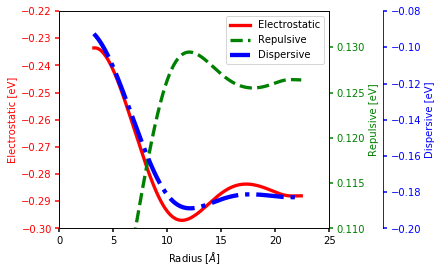

In [194]:
def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()


par2.spines["right"].set_position(("axes", 1.2))

make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(a.new_cutoff, a.new_coulomb_vs_cutoff, "r-",     label="Electrostatic", linewidth=3.3)
p2, = par1.plot(a.new_cutoff, a.new_repulsion_vs_cutoff, "g-", label="Repulsive", linewidth=3.3, linestyle='--')
p3, = par2.plot(a.new_cutoff, a.new_dispersion_vs_cutoff, "b-", label="Dispersive", linewidth=4.3, linestyle='-.')

host.set_xlim(0, 25)
host.set_ylim(-0.30, -0.22)
par1.set_ylim(0.11, 0.134)
par2.set_ylim(-0.20, -0.08)

host.set_xlabel("Radius [$\AA$]")
host.set_ylabel("Electrostatic [eV]")
par1.set_ylabel("Repulsive [eV]")
par2.set_ylabel("Dispersive [eV]")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines]) 